# Assignment Module 4: Feature Selection & Dimensionality Reduction
## Group Members:

- Julian Ruggiero.
- Eli Weiss.
- Omar M. Hussein.


<img src="/Images/route-fifty-lead-image.jpg">

## Introduction

The fuel economy of an automobile relates distance traveled by a vehicle and the amount of fuel consumed. Different methods are used to approximate the actual performance of the vehicle. For this project we are going to be using linear regression model that predicts automobile gas mileage.

__Goal:__ apply feature selection and/or dimensionality reduction techniques to identify the explanatory variables to be included within a linear regression model.

__Data Origin:__
The data set that will be used is sourced from the UC Irvine machine learning archive [ 1 ].
<br>

__Workflow:__
<br>
__1)__ Load the data and read it from github and perform EDA separately on both categorical and numerical attributes. <br>
__2)__ Deal with the missing data through imputation. <br>
__3)__ Feature Selection  & Dimensionality reduction.<br>
__4)__ Model Creation & Cross-Validation <br>
__5)__ Conclusion.<br>



***

## Data Dictionary

In order to have context for this study, data definitions for each of the attributes are provided below:

<br>

1. __symboling:__ -3, -2, -1, 0, 1, 2, 3. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
2. __normalized-losses:__ continuous from 65 to 256. This is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/specialty, etc…), and represents the average loss per car per year.
3. __make:__ alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo.
4. __fuel-type:__ diesel, gas.
5. __aspiration:__ std, turbo.
6. __num-of-doors:__ four, two.
7. __body-style:__ hardtop, wagon, sedan, hatchback, convertible.
8. __drive-wheels:__ 4wd, fwd, rwd.
9. __engine-location:__ front, rear.
10. __wheel-base:__ continuous from 86.6 120.9.
11. __length:__ continuous from 141.1 to 208.1.
12. __width:__ continuous from 60.3 to 72.3.
13. __height:__ continuous from 47.8 to 59.8.
14. __curb-weight:__ continuous from 1488 to 4066.
15. __engine-type:__ dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. __num-of-cylinders:__ eight, five, four, six, three, twelve, two.
17. __engine-size:__ continuous from 61 to 326.
18. __fuel-system:__ 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. __bore:__ continuous from 2.54 to 3.94.
20. __stroke:__ continuous from 2.07 to 4.17.
21. __compression-ratio:__ continuous from 7 to 23.
22. __horsepower:__ continuous from 48 to 288.
23. __peak-rpm:__ continuous from 4150 to 6600.
24. __city-mpg (response variable):__ continuous from 13 to 49.
25. __highway-mpg:__ continuous from 16 to 54.
26. __price:__ continuous from 5118 to 45400.


## Helper Functions

Helper Functions are user defined functions that will be used later on in this study.<br/>
Below are several functions:<br/>
__1)__ Backwards elimination - This is a model selection technique<br/>
__2)__ Display Scores        - This function returns the cross validated scores of a model<br/>
__3)__ Calc VIF              - This returns the VIF score for every variable in a dataframe

In [1]:
def backwards_elem(data_frame,dep_var,col_list):
    
    """
    Receives a dataframe, dep_val (target variable) and 
    initial list of explanatory features. 
    Returns the list of attributes with a p-value lower than 0.05
        Output => list
    """
    while len(col_list) > 0:
        
        # Creating a model.
        model=sm.OLS(dep_var, data_frame[col_list])#.fit()
        
        # Result of the model fitting.
        result=model.fit(disp=0)
        
        # Getting the largest values
        largest_pvalue=round(result.pvalues,3).nlargest(1)        
        
        # Checking if the signficiance level is lower than 0.05.
        if largest_pvalue[0]<(0.05):
            return col_list
        # Drop the lowest one,
        else:
            col_list.remove(largest_pvalue.index[0])  
            
def display_scores(scores):
    
    '''
        provides Score analysis for cross validation

    '''
    print("\nScores:",scores,"\n")
    print("Mean:",scores.mean(),"\n")
    print("Standard Deviation:",scores.std(),"\n")             
            
def calc_vif(X):
    
    ''' Calculating variance inflation factor
    Receives a dataframe
    Output => Dataframe with column and the VIF 
    '''
    vif = pd.DataFrame() # Creating a dataframe object.
    vif["variables"] = X.columns # Getting the cols.
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)        

## Import Packages and Libraries

Below we import the libraries, packages, and formatting for the plots we are going to be using in this study.

In [2]:
# importing libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
import numpy as np
from pandas.plotting import scatter_matrix
import missingno as msno
import statsmodels.api as sm
import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor

# styling matplotlib graphs
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,4)

C:\Users\julir\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


## Data Cleaning 

### Providing meaningful column names to the dataframe

Since the data came with names that were not legible, we have cleaned up the data frame so that it is more user friendly.

In [3]:
#Define the Col Names
columns=['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
        'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
        'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size',
        'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower',
        'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

In [4]:
# Reading from repo. and rename the cols 
df = pd.read_csv("https://raw.githubusercontent.com/OMS1996/DAV-6150-Data-Science/master/Data/M4_Data.csv",names=columns)

# Sanity check
df.head(3)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


### Missing values

We can clearly see that there are several question marks ('?'). These represent Null values in the data. Below we replace the question marks with Null values. We did this because it is easier to impute data and identifying missing values with NaN's.

In [5]:
# Replacing the question marks with NaN.
df = df.replace('?', np.NaN)

# Show the top 3.
df.head(3)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


### Reformating strings into Numeric values


Below we wil take data which is formatted as text and replace it with numerical values that correspond. We do this for columns: num_of_doors and num_of_cylinders.
<br/>(i.e. for 'two' we will replace it with 2)

In [6]:
#checking num-of-doors values
df['num_of_doors'].value_counts()

four    114
two      89
Name: num_of_doors, dtype: int64

In [7]:
#replacing with numbers for future section on ML model creation
df['num_of_doors'].replace('two', 2, inplace=True)
df['num_of_doors'].replace('four', 4, inplace=True)

In [8]:
#checking num-of-doors values
df['num_of_cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [9]:
df['num_of_cylinders'].replace('four', 4, inplace=True)
df['num_of_cylinders'].replace('six', 6, inplace=True)
df['num_of_cylinders'].replace('five', 5, inplace=True)
df['num_of_cylinders'].replace('eight', 8, inplace=True)
df['num_of_cylinders'].replace('two', 2, inplace=True)
df['num_of_cylinders'].replace('twelve', 12, inplace=True)
df['num_of_cylinders'].replace('three', 3, inplace=True)

In [10]:
#checking num_of_cylinders values
df['num_of_cylinders'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num_of_cylinders, dtype: int64

## Part 1 - Exploratory Data Analysis 

### Missing Data

In this section we will check for the missing values in the data and visualize what is missing so we can make an informed decision on which strategy to pursue to handle missing values.

In [11]:
print()
print("\t \t \t \tCount of the Missing Values")

# Seperator
print("\t \t-----------------------------------------------------------")

#getting exact number of null values in each column
print("")
missing = df.isnull().sum()
missing.sort_values(inplace=True,ascending=False)
print(missing[0:9])

# Seperator
print("\t \t\t\tMissing Values as a percentage %")
print("\t \t-----------------------------------------------------------")

#getting exact number of null values in each column
# get percent of missing data
print("")
missing = df.isnull().mean() * 100
missing.sort_values(inplace=True,ascending=False)
missing[0:8]


	 	 	 	Count of the Missing Values
	 	-----------------------------------------------------------

normalized_losses    41
price                 4
stroke                4
bore                  4
peak_rpm              2
horsepower            2
num_of_doors          2
length                0
make                  0
dtype: int64
	 			Missing Values as a percentage %
	 	-----------------------------------------------------------



normalized_losses    20.00000
price                 1.95122
stroke                1.95122
bore                  1.95122
peak_rpm              0.97561
horsepower            0.97561
num_of_doors          0.97561
length                0.00000
dtype: float64

We see null values in 7 features: normalized-losses, bore, stroke, price, num-of-doors, horsepower and peak-rpm, with 'normalized-losses' as the attribute with the highest number of missing data with 41, that corresponds to 20% of the records.

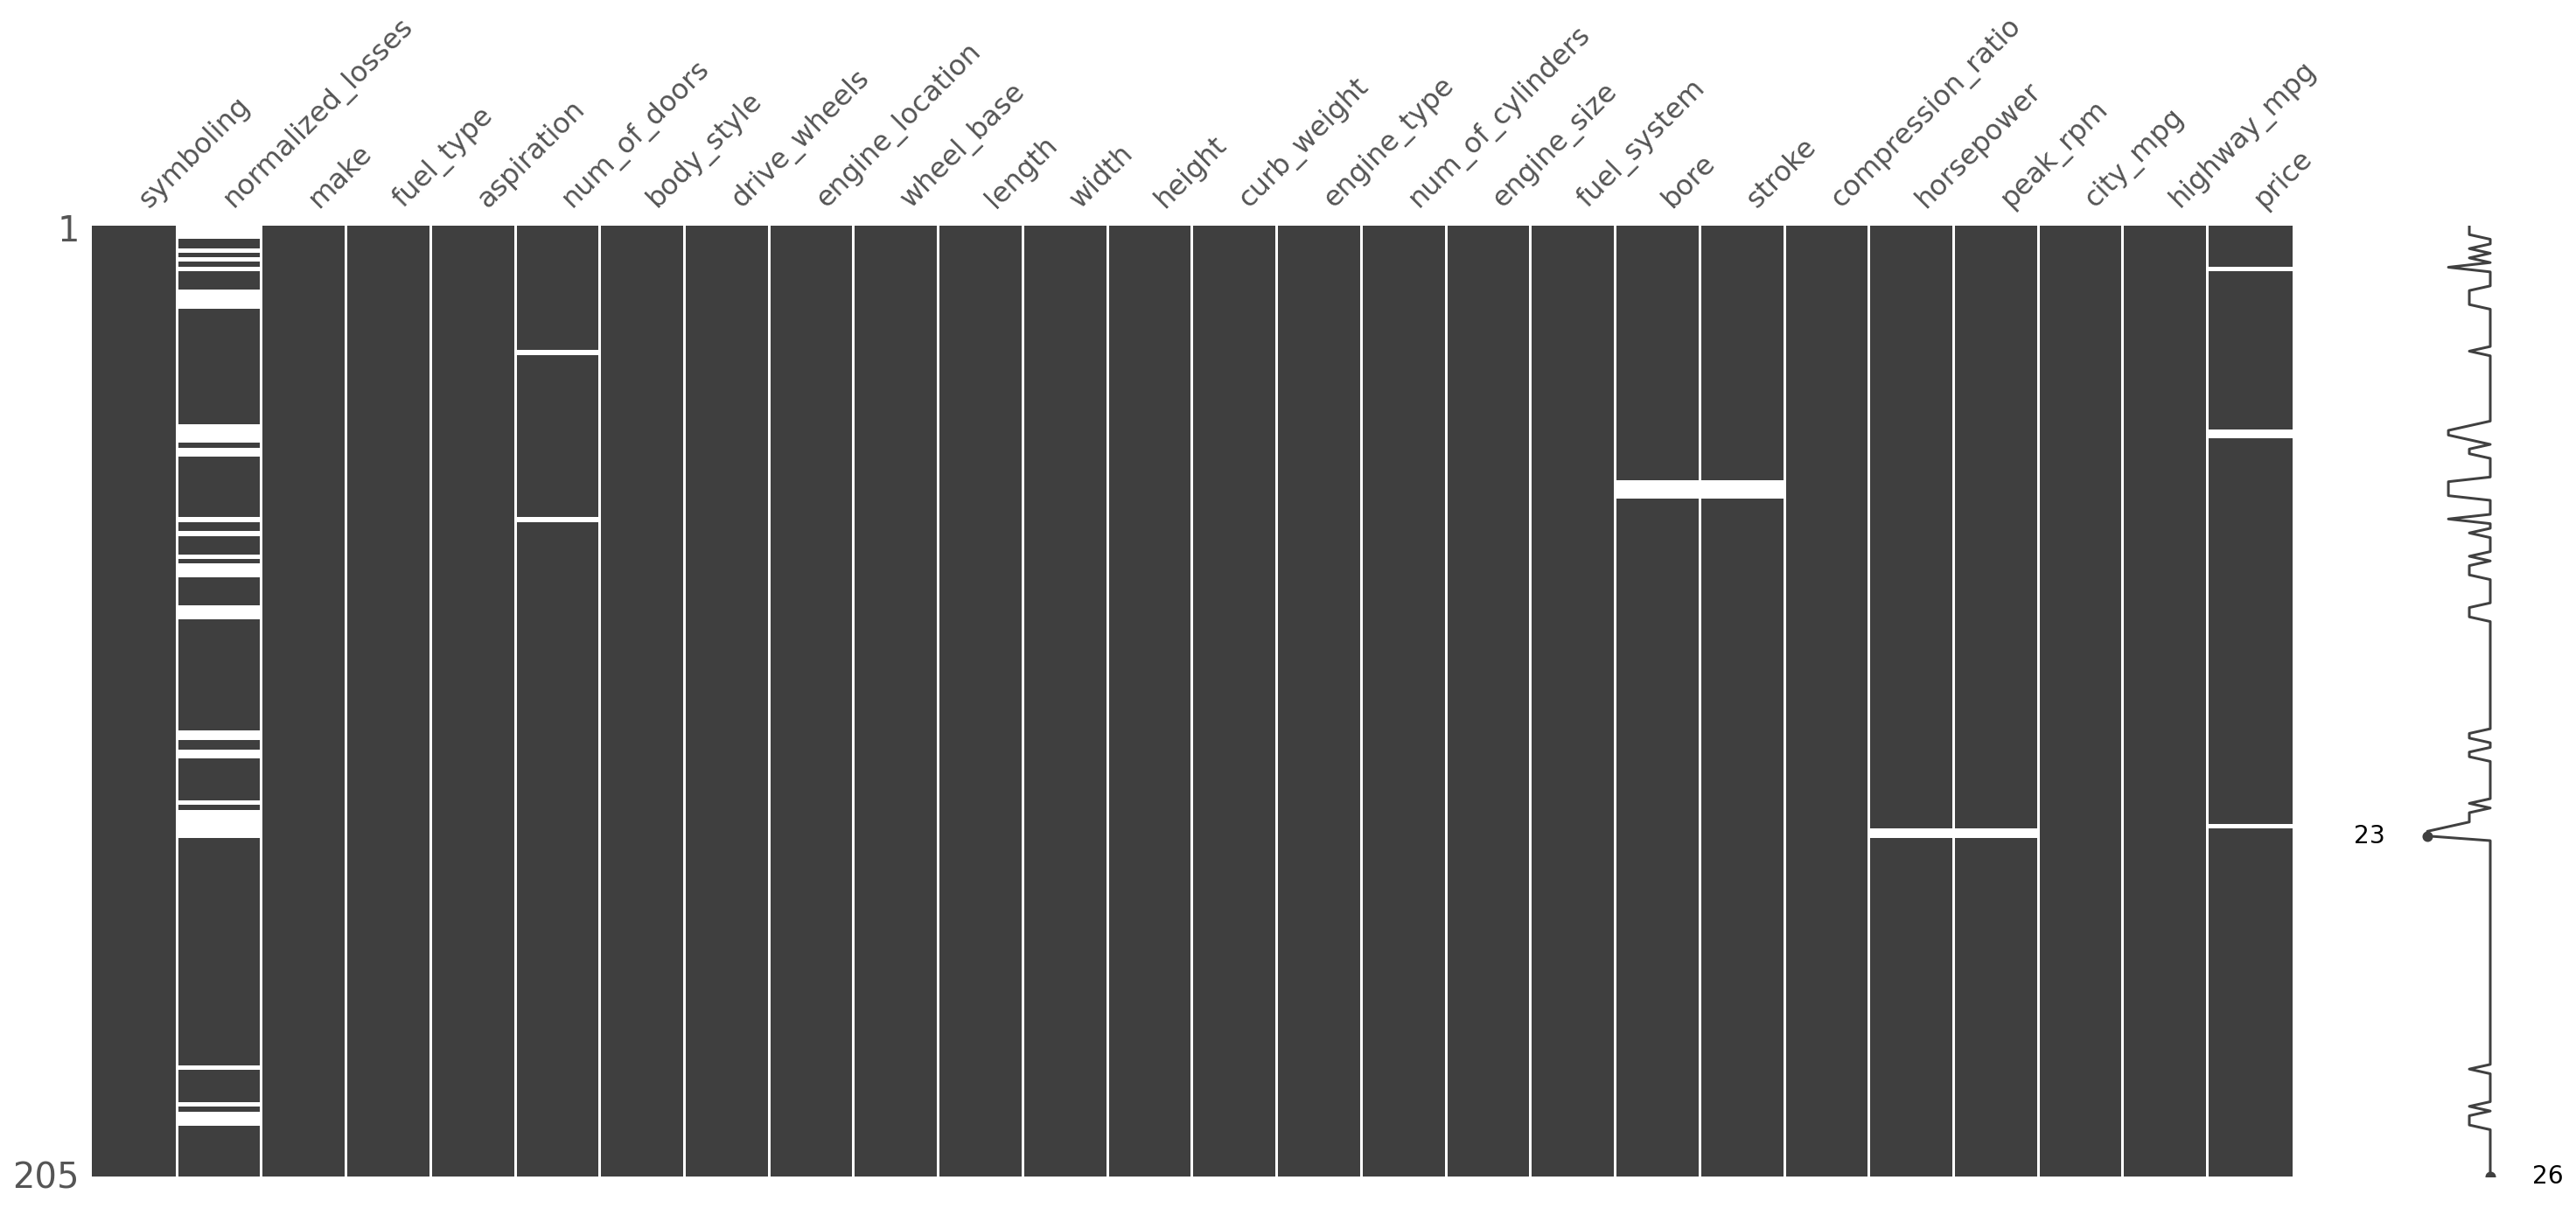

In [12]:
#null visualization pattern
msno.matrix(df)
plt.show();

Based on the matrix we can see that there are small groups of consecutive values missing in the normalized_losses, but there is not a clear pattern, suggesting that the data is missing at random.

Now we check the different datatypes along the dataset.

In [13]:
# Getting info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    float64
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    int64  
 16  engine_size        205 non

We can see that there are some inconsistencies with the data types, for example attributes like normalized_losses, horsepower, price, among others are stored as string, but they should be integers. To be able to change the data type we should fix the missing values issue first.

### Replacing Null Values

Below we will replace null values in the attributes: num_of_doors, horsepower, peak_rpm, price, stroke and bore. Since the number of missing values in these attributes is very small (i.e. only 2% missing for price) we can replace the null values in each future with the median of their respective attribute.

In [14]:
#filling null value in each column with the corresponding median
df['num_of_doors'].fillna(df['num_of_doors'].median(), inplace=True)
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
df['peak_rpm'].fillna(df['peak_rpm'].median(), inplace=True)
df['price'].fillna(df['price'].median(), inplace=True)
df['stroke'].fillna(df['stroke'].median(), inplace=True)
df['bore'].fillna(df['bore'].median(), inplace=True)

In [15]:
#checking missing values count
df.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          0
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  0
stroke                0
compression_ratio     0
horsepower            0
peak_rpm              0
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

The null values were replaced. Now we can fix the data types for these columns.

In [16]:
#fix some data types, convert to numeric certain columns following data dictionary
df = df.astype({"horsepower": int, "peak_rpm":int, "price":int, "bore":float, "stroke":float})

#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    float64
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    int64  
 16  engine_size        205 non

We finished fixing almost all of the missing data and data types.

### Categorical EDA

We will revisit how we will fill the Nulls for normalized_losses later. Now that we have replaced most of the Null values in the data, we will perform some exploratory data analysis on our categorical data.

In [17]:
#creating a list with the categorical attributes
categorical_features=['make','fuel_type','symboling', 'aspiration', 'body_style',
                      'drive_wheels', 'engine_location', 'engine_type','fuel_system']

To have a closer look at each one we will plot 3 at a time, starting with 'make','fuel_type' and 'symboling' displaying distributions and boxplot.

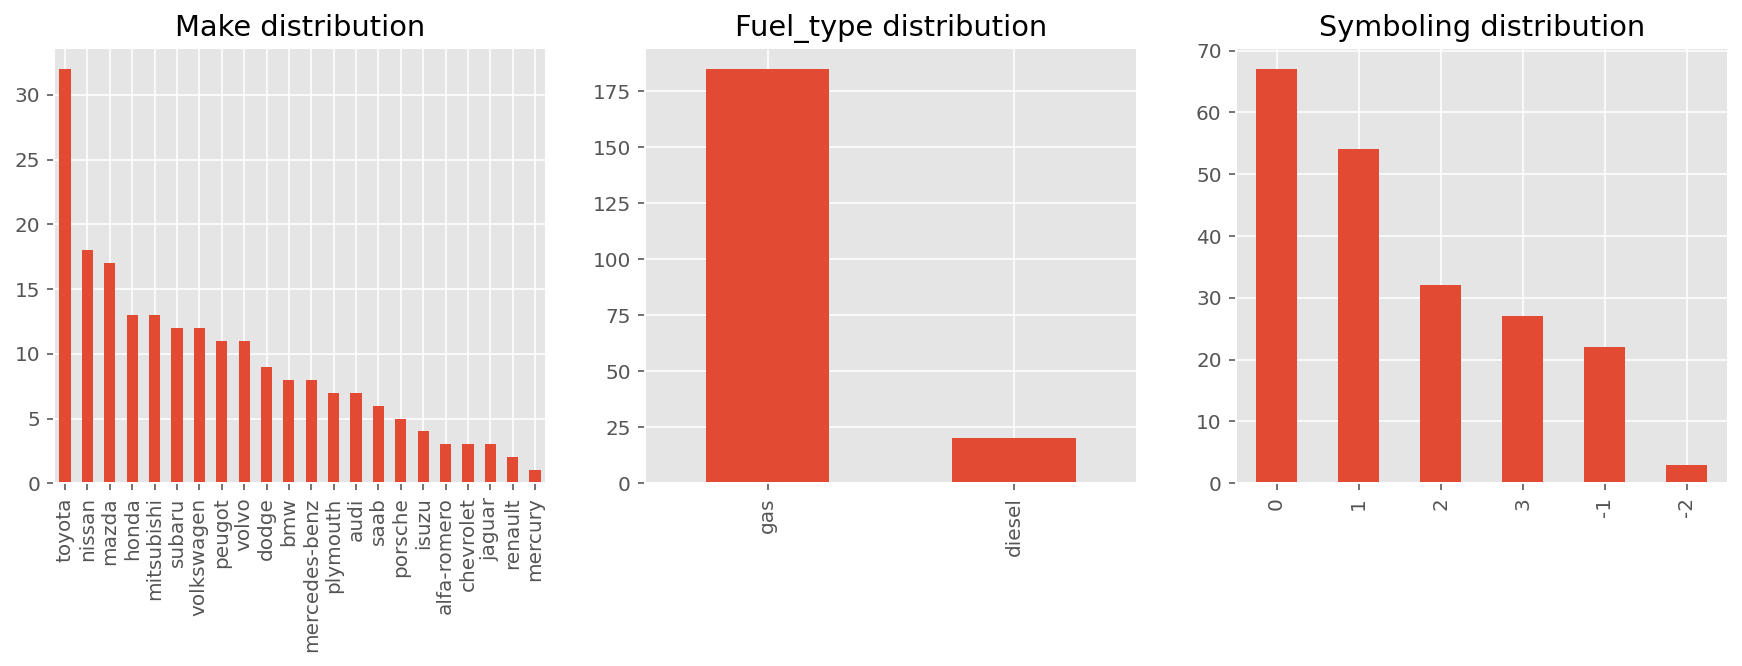

In [18]:
#showing distributions
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 3, 1)
df['make'].value_counts().plot.bar()
plt.title("Make distribution");

plt.subplot(1, 3, 2)
df['fuel_type'].value_counts().plot.bar()
plt.title("Fuel_type distribution");

plt.subplot(1, 3, 3)
df['symboling'].value_counts().plot.bar()
plt.title("Symboling distribution");

We see that there is sparse data or skewed data in all three of our attributes. We look at the boxplots.

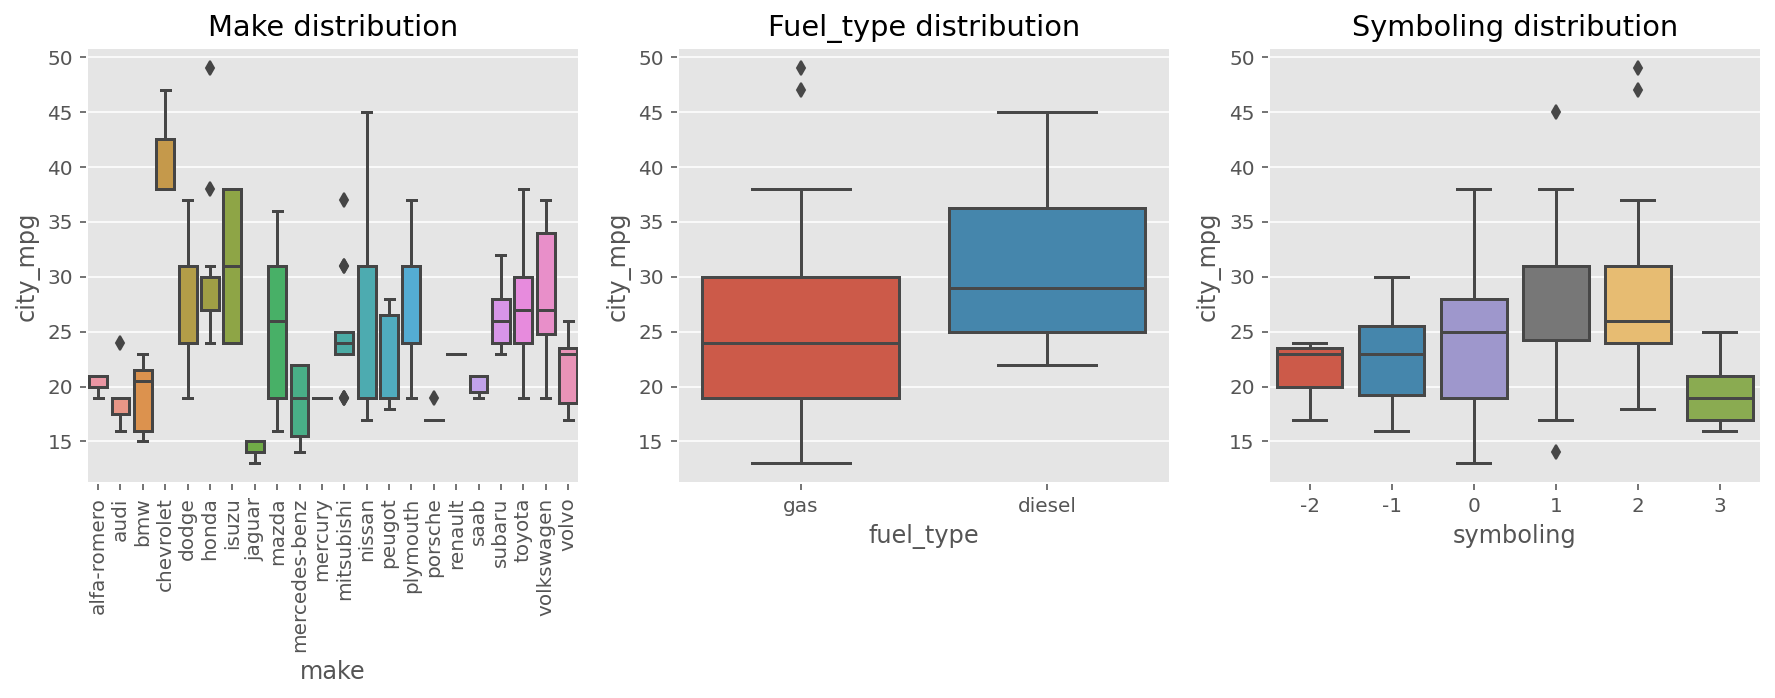

In [19]:
#showing boxplots
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 3, 1)
ax=sns.boxplot(x="make", y="city_mpg", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Make distribution");

plt.subplot(1, 3, 2)
sns.boxplot(x="fuel_type", y="city_mpg", data=df)
plt.title("Fuel_type distribution");

plt.subplot(1, 3, 3)
sns.boxplot(x="symboling", y="city_mpg", data=df)

plt.title("Symboling distribution");

For fuel_type we can see that, even though the data is imbalanced it seems to be a promising predictor. <br>
Make feature can be grouped, setting a threshold (for example 5) to combine together cars and avoid sparse observations.

Now that we have explored three of our fields let's take a look at the next three:

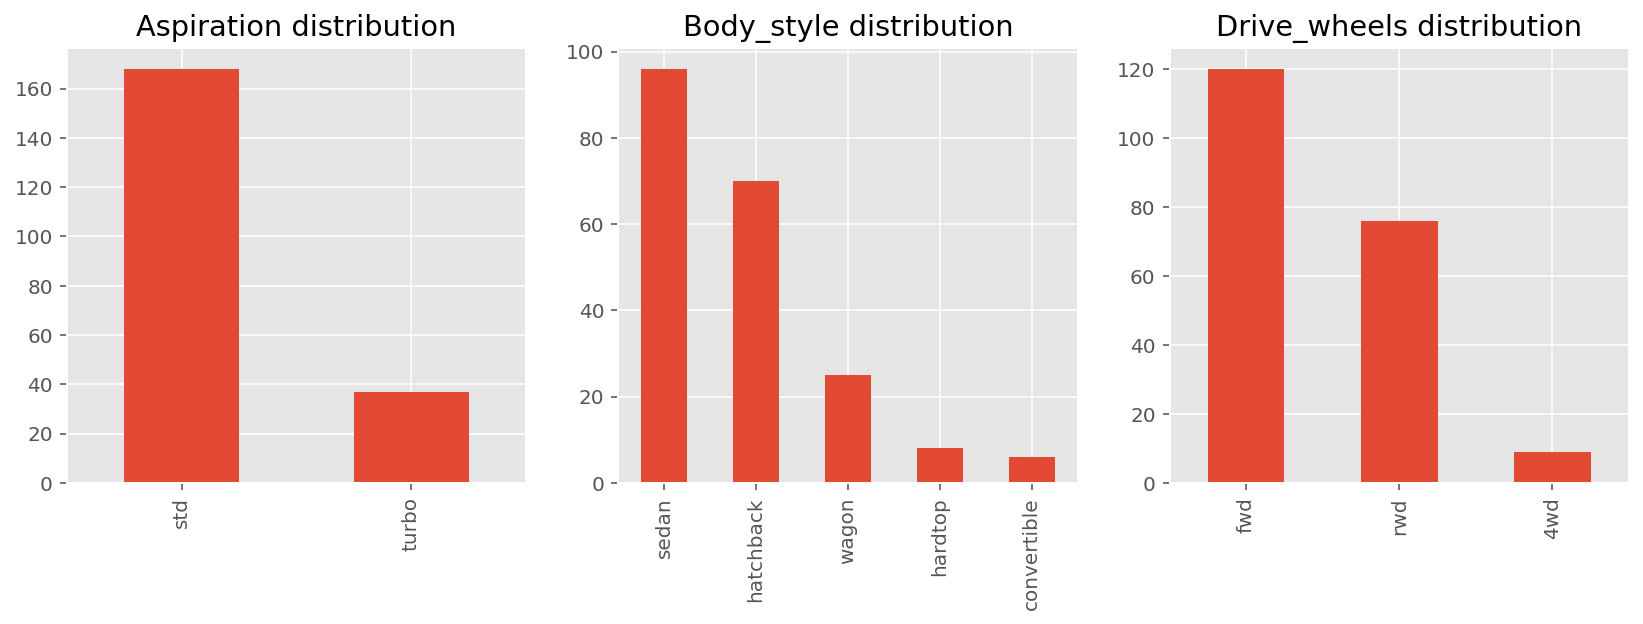

In [20]:
#showing distribution plot 'aspiration', 'body_style', 'drive_wheels'
fig = plt.figure(figsize=(14,4))
plt.subplot(1, 3, 1)
df['aspiration'].value_counts().plot.bar()
plt.title("Aspiration distribution");

plt.subplot(1, 3, 2)
df['body_style'].value_counts().plot.bar()
plt.title("Body_style distribution");

plt.subplot(1, 3, 3)
df['drive_wheels'].value_counts().plot.bar()
plt.title("Drive_wheels distribution");

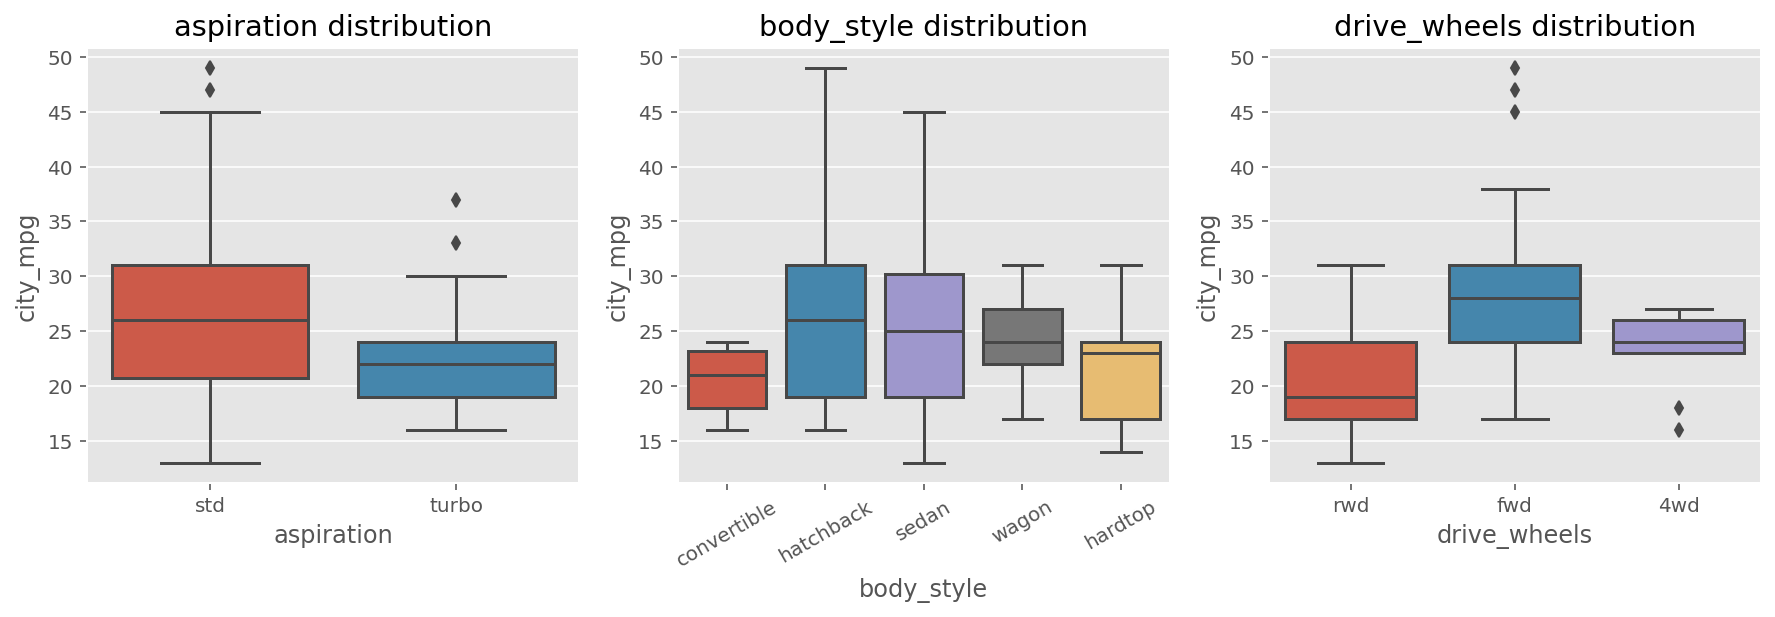

In [21]:
#showing boxplots
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 3, 1)
sns.boxplot(x="aspiration", y="city_mpg", data=df)
plt.title("aspiration distribution");

plt.subplot(1, 3, 2)
ax=sns.boxplot(x="body_style", y="city_mpg", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title("body_style distribution");

plt.subplot(1, 3, 3)
sns.boxplot(x="drive_wheels", y="city_mpg", data=df)
plt.title("drive_wheels distribution");

Based on our research we understand that for drive_wheels, FWD means that the power from the engine is delivered to the front wheels of your vehicle, RWD means that the power from the engine is delivered to the rear wheels and the rear wheels push the car forward, 4WD means the power from the engine is delivered to all 4 wheels all of the time 4X4. It seems that cars with rear wheels have in general lower mpg whereas fwd have a higher one, although there is a very small number of observations for 4WD.

For aspiration, we can see that cars with turbo tend to have a higher fuel consumption, which suggest it would be a promising feature to include in our model. <br>

Now that we have explored six of our fields let's take a look at the next three:

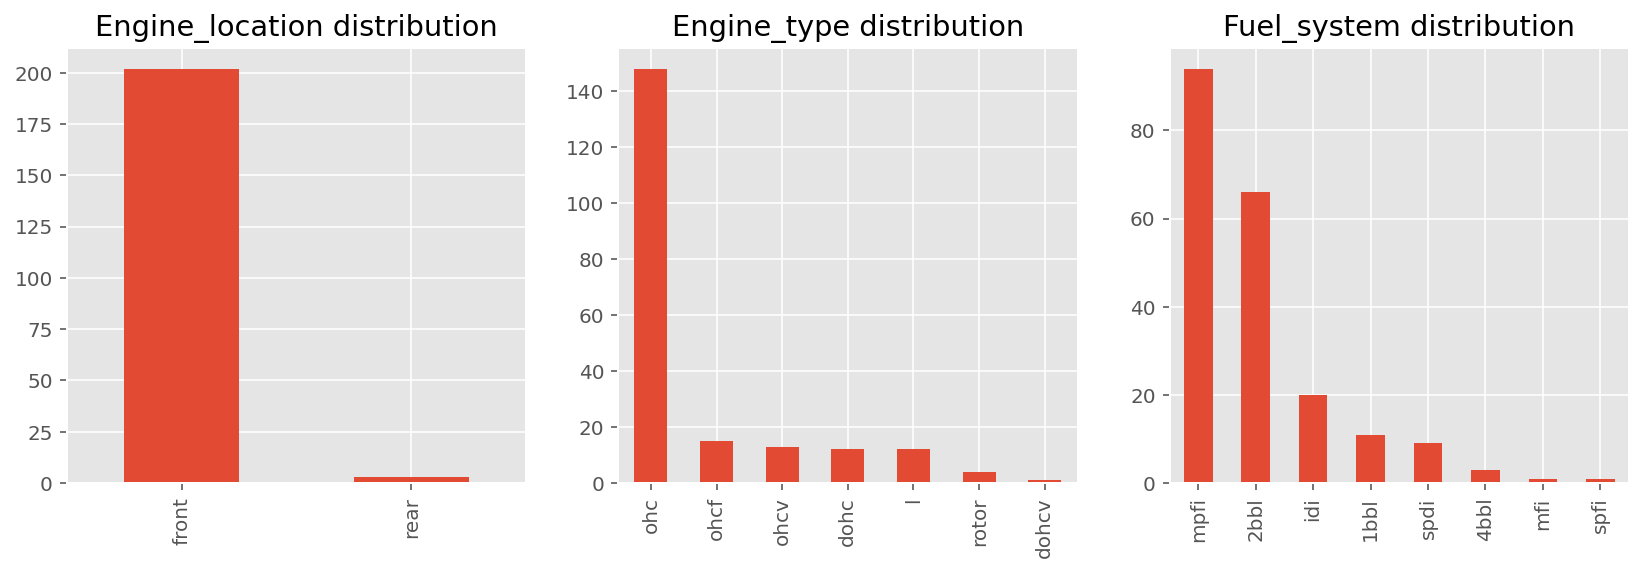

In [22]:
#showing distribution plot ''engine_location', 'engine_type' 'fuel_system'

# Engine loc.
fig = plt.figure(figsize=(14,4))
plt.subplot(1, 3, 1)
df['engine_location'].value_counts().plot.bar()
plt.title("Engine_location distribution");

# Engine type.
plt.subplot(1, 3, 2)
df['engine_type'].value_counts().plot.bar()
plt.title("Engine_type distribution");

# Fuel system.
plt.subplot(1, 3, 3)
df['fuel_system'].value_counts().plot.bar()
plt.title("Fuel_system distribution");

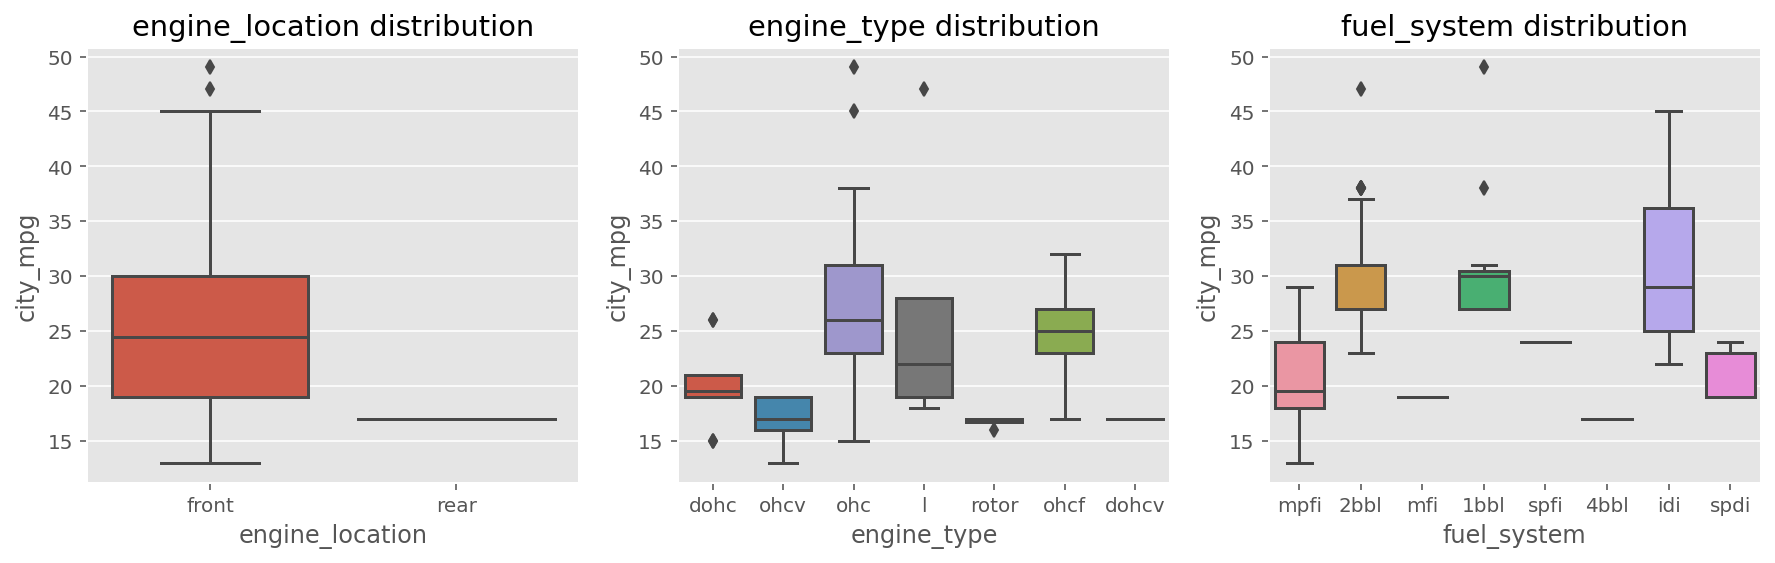

In [23]:
#showing boxplots
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 3, 1)
sns.boxplot(x="engine_location", y="city_mpg", data=df)
plt.title("engine_location distribution");

plt.subplot(1, 3, 2)
sns.boxplot(x="engine_type", y="city_mpg", data=df)
plt.title("engine_type distribution");

plt.subplot(1, 3, 3)
sns.boxplot(x="fuel_system", y="city_mpg", data=df)
plt.title("fuel_system distribution");

We can see an imbalance distribution for engine_location, hence we might be able to exclude this feature as it has almost no variance on itself. We see sparce data for engine_type and fuel_system. [ 2 ]

### Numerical EDA

After exploring the categorical data we will now turn our attention to preforming exploratory data analysis on our numerical attributes. 

In [24]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    float64
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    int64  
 16  engine_size        205 non

normalized_losses has null values and its type is object, we will change to float, so to include the valid ones in our correlation matrix.

In [25]:
#changing data type
df = df.astype({"normalized_losses": float})

We create a list of numerical features to use later and we remove symboling, as it is categorical

In [26]:
numerical_features=df.corr().columns.to_list()
numerical_features.remove('symboling')

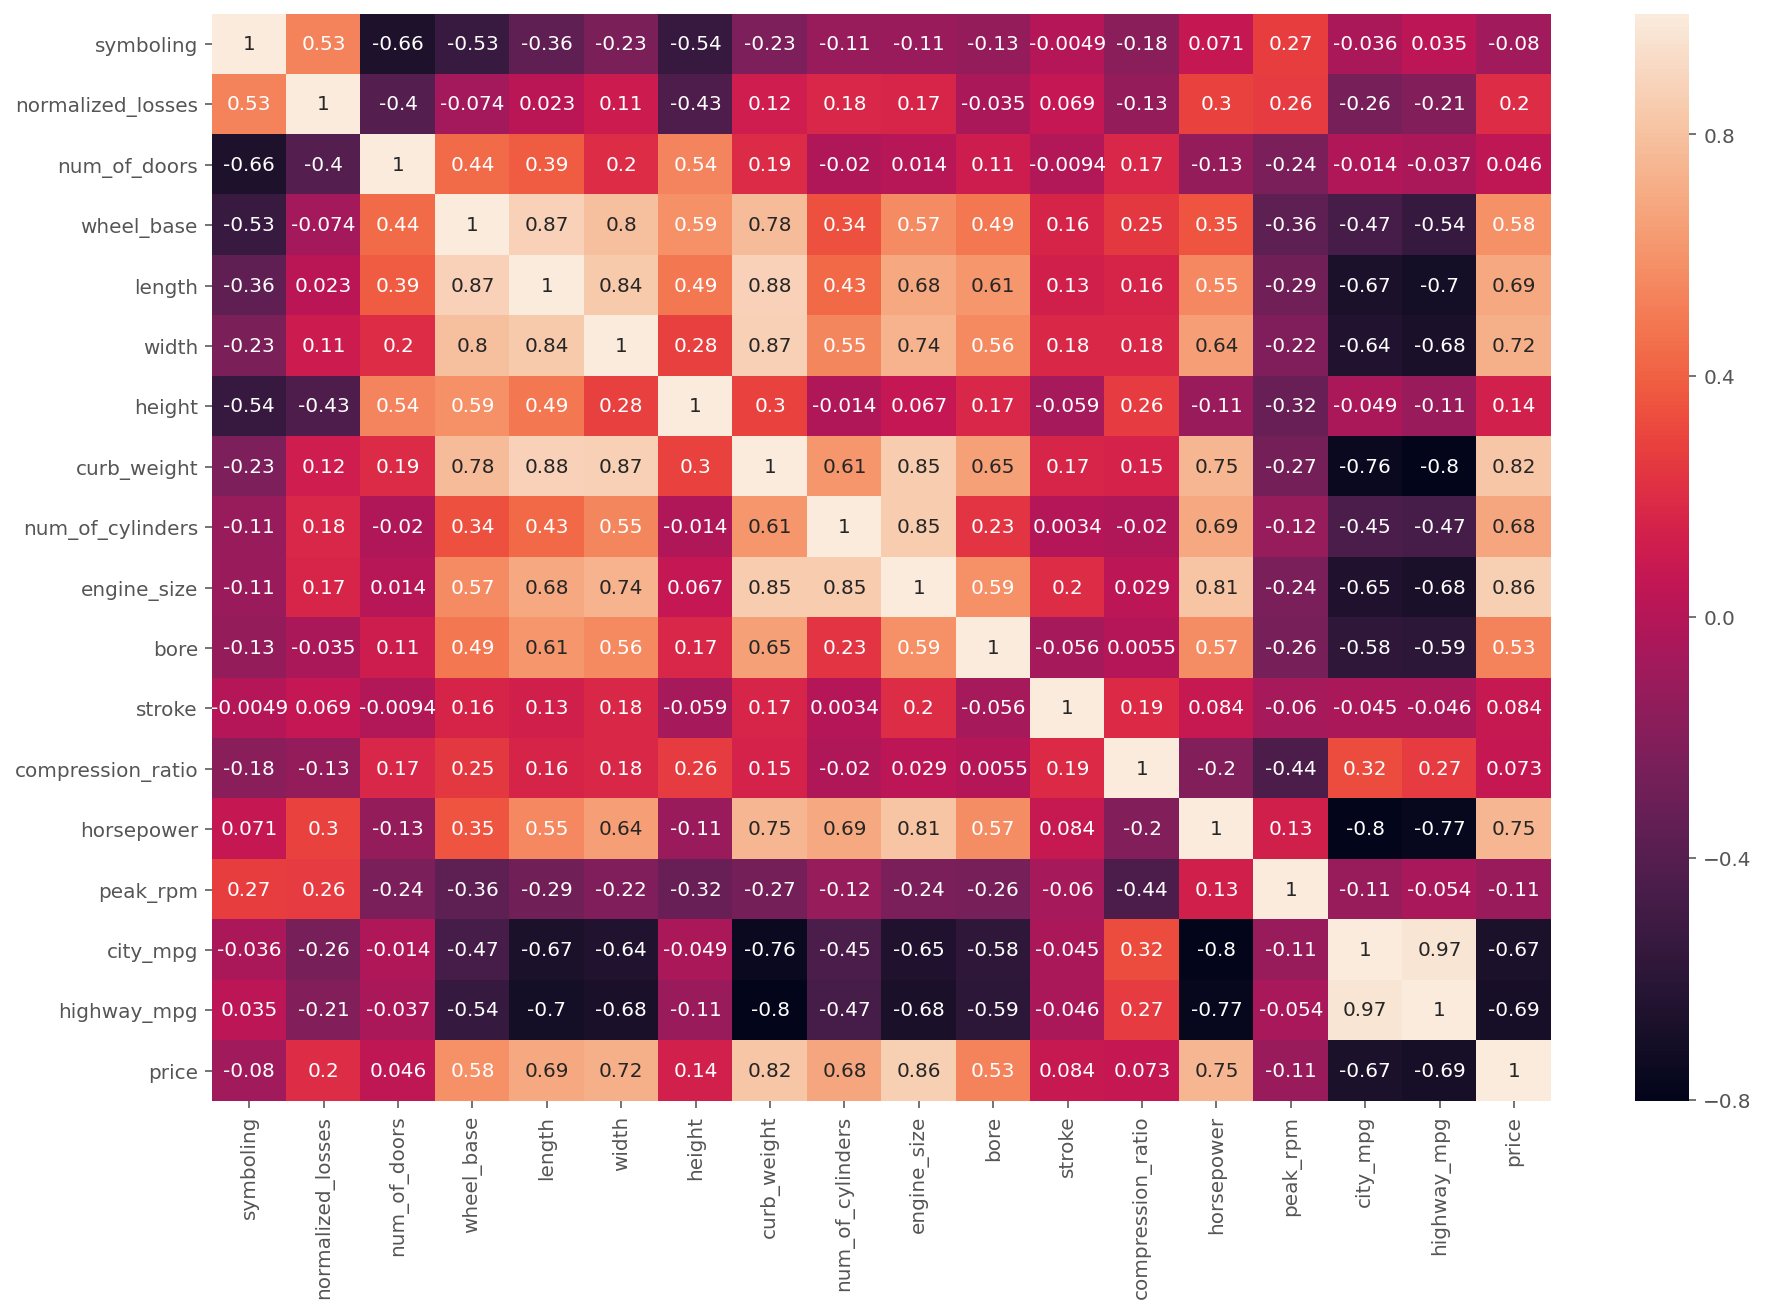

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True);

__Insights:__ <br>
According to this graph, we can see an almost perfect correlation between highway-mpg and the response city-mpg but we won't consider it a potential predictor as both are measuring something similar, (the highway-mpg could have been our target variable).

It is interesting to see that there are 4 features related to the car dimensions (curb-weight, length, engine-size and width) that have a high negative correlation (< - 0.6) which suggests that big cars tend to use more fuel than smaller ones to travel the same distance. It would be interesting to include these in our model.

Now we display features distributions

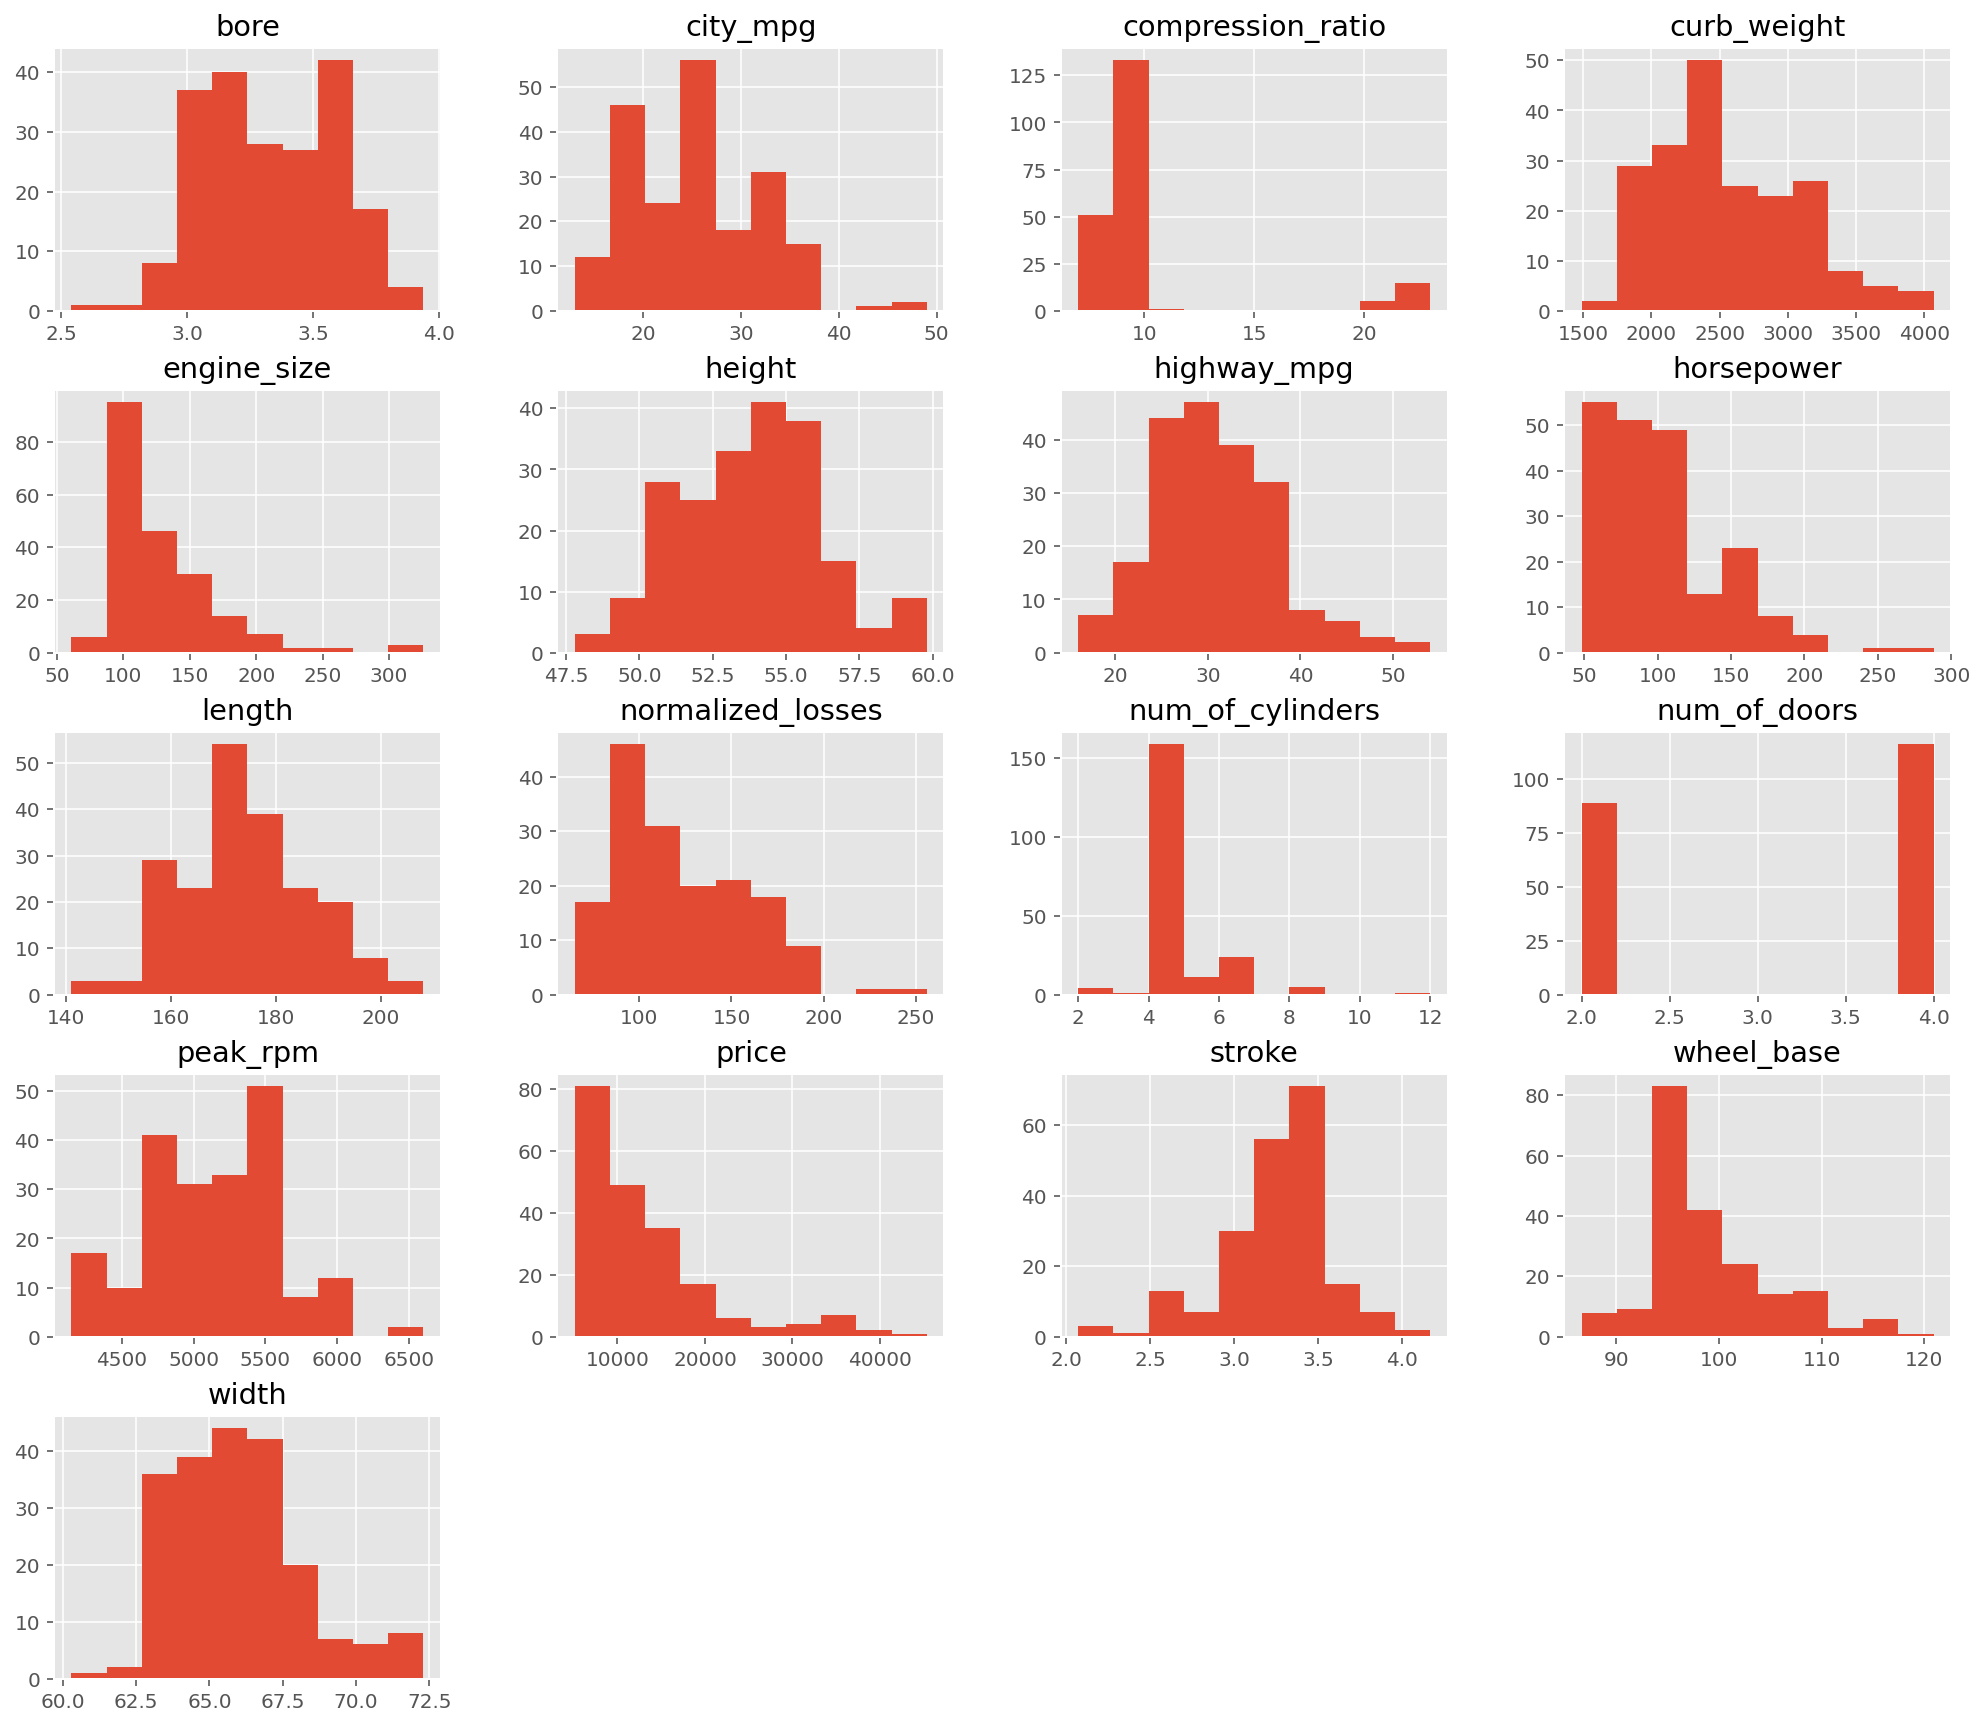

In [28]:
df[numerical_features].hist(figsize =(17,15));

Above we can see how the data for all the numerical attiributes are distributed, some contain skewed data, while some are normally distributed. We will address these issues later in the study. 

### Missing values normalized_losses 

After Preforming EDA for both categorical and numerical data we can now return to our question of how do deal with all of the missing data in normalized_losses?<br/><br/>
#### Below we will explore two options:<br/><br/>
__1)__ Iterative Imputer<br/>
__2)__ Median Values

#### Option 1: Iterative Imputer

We choose this technique because of the wide variety of attributes in the dataset and that we need to fill more than a few rows, so we will apply it and see if it maintains the shape of the probability density function we derived from the variable's known data.

Imputation via an iterative imputer (i.e., each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features.

First step will be to create dummy variables for existing categorical features.

In [29]:
#checking categorical features
categorical_features

['make',
 'fuel_type',
 'symboling',
 'aspiration',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'fuel_system']

In [30]:
#first create dummies for all categorical variables, but the symboling
categorical_dummies = pd.DataFrame()
dummies_make = pd.get_dummies(df['make'], prefix='make')
dummies_fuel_type = pd.get_dummies(df['fuel_type'], prefix='fuel_type')
dummies_aspiration = pd.get_dummies(df['aspiration'], prefix='aspiration')
dummies_body_style = pd.get_dummies(df['body_style'], prefix='body_style')
dummies_drive_wheels = pd.get_dummies(df['drive_wheels'], prefix='drive_wheels')
dummies_engine_location = pd.get_dummies(df['engine_location'], prefix='engine_location')
dummies_engine_type = pd.get_dummies(df['engine_type'], prefix='engine_type')
dummies_fuel_system = pd.get_dummies(df['fuel_system'], prefix='fuel_system')

Now we create a new dataframe called 'df_with_dummy', with the previous df plus the new columns

In [31]:
#join dummies together
df_with_dummy = df.join(dummies_make).join(dummies_fuel_type).join(dummies_aspiration).join(dummies_body_style).join(dummies_drive_wheels).join(dummies_engine_location).join(dummies_engine_type).join(dummies_fuel_system)

We need to drop the original columns, as they were converted.

In [32]:
#drop original columns
df_with_dummy.drop(columns=['make','fuel_type','aspiration','body_style','drive_wheels','engine_location','engine_type','fuel_system'], inplace=True),

(None,)

In [33]:
#check df_with_dummy shape
df_with_dummy.shape

(205, 69)

In [34]:
#check existing null values
df_with_dummy.normalized_losses.isnull().sum()

41

Below is the code to implement the IterativeImputer using sklearn.

In [35]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import scipy

# define imputer
imputer = IterativeImputer(random_state=0)

# fit on the dataset
imputer.fit(df_with_dummy)

# transform the dataset
df_imputed_trans = imputer.transform(df_with_dummy)
df_imputed_trans

array([[  3.        , 180.02855446,   2.        , ...,   1.        ,
          0.        ,   0.        ],
       [  3.        , 181.06693048,   2.        , ...,   1.        ,
          0.        ,   0.        ],
       [  1.        , 168.60276378,   2.        , ...,   1.        ,
          0.        ,   0.        ],
       ...,
       [ -1.        ,  95.        ,   4.        , ...,   1.        ,
          0.        ,   0.        ],
       [ -1.        ,  95.        ,   4.        , ...,   0.        ,
          0.        ,   0.        ],
       [ -1.        ,  95.        ,   4.        , ...,   1.        ,
          0.        ,   0.        ]])

The output is a numpy ndarray, we convert it back to a dataframe.

In [36]:
#get transformed numpy array as a dataframe
df_imputed_trans = pd.DataFrame(df_imputed_trans, columns=df_with_dummy.columns)
df_imputed_trans.head(1)

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,...,engine_type_ohcv,engine_type_rotor,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3.0,180.028554,2.0,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


We check that we do not have any missing value left.

In [37]:
#checking that there are no null values, and there aren't
df_imputed_trans.normalized_losses.isnull().sum()

0

We create a dataframe with the rows that were missing.

In [38]:
#delete any row with at least one null value
null_free=df.dropna(how="any")
null_free.shape

(164, 26)

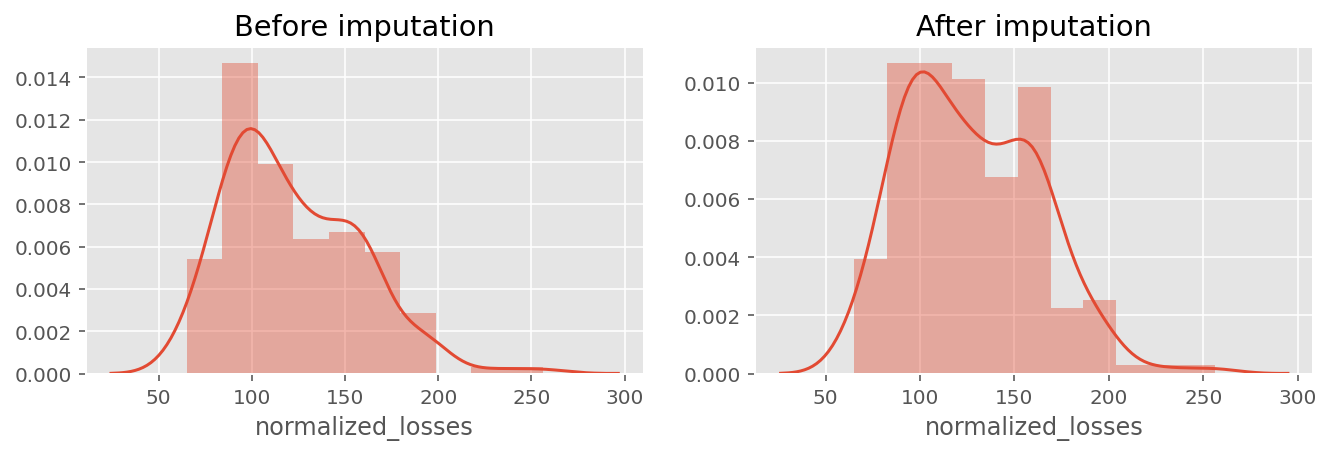

In [39]:
#checking distribution before and after
fig = plt.figure(figsize=(11,3))
plt.subplot(1, 2, 1)
sns.distplot(null_free["normalized_losses"]);
plt.title("Before imputation");

plt.subplot(1, 2, 2)
sns.distplot(df_imputed_trans["normalized_losses"]);
plt.title("After imputation");

We look closer at the describe statistics for each dataframe

In [40]:
#stats for the original df with missing values
null_free.normalized_losses.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized_losses, dtype: float64

In [41]:
#stats for the new dataframe without missing values
df_imputed_trans.normalized_losses.describe()

count    205.000000
mean     127.075637
std       35.454537
min       65.000000
25%       99.008090
50%      122.081175
75%      154.000000
max      256.000000
Name: normalized_losses, dtype: float64

We see that after trying to use the Iterative Imputer we see that the PDF has changed dramatically, this is not an ideal solution. Let's continue to explore what will happen with Option 2.

--------------------------------------------------------------------------------------------------------------------------

#### Option 2: Median

Despite this would not be an ideal solution we decided to create it to compare with the previous technique for this specific dataset. We replace missing values with the 'normalized_losses' median, which is 115.

In [42]:
df['normalized_losses'].median()

115.0

In [43]:
#imputing the median
df['normalized_losses'].fillna(df['normalized_losses'].median(), inplace=True)

#checking that there are no null values, and there aren't
df.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

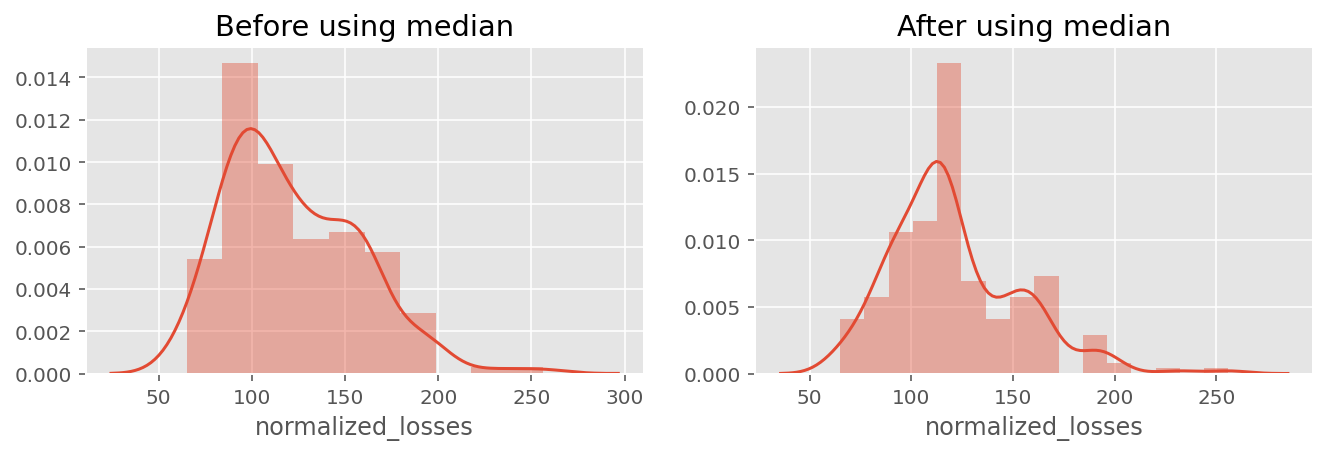

In [44]:
#checking distribution before and after with the median
fig = plt.figure(figsize=(11,3))
plt.subplot(1, 2, 1)
sns.distplot(null_free["normalized_losses"]);
plt.title("Before using median");

plt.subplot(1, 2, 2)
sns.distplot(df["normalized_losses"]);
plt.title("After using median");

In [45]:
null_free.normalized_losses.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized_losses, dtype: float64

In [46]:
df.normalized_losses.describe()

count    205.000000
mean     120.600000
std       31.805105
min       65.000000
25%      101.000000
50%      115.000000
75%      137.000000
max      256.000000
Name: normalized_losses, dtype: float64

The median seems to be the imputation method that preserves the PDF the most. Because this is the case, we will use the median as the imputation method.

## Part 3 - Feature Selection

### Feature Selection

After EDA we have a good idea of what attributes will be predictive we will explore this as an approach to Feature Selection

We learned that:
- We might want to exclude: <br>
    - __highway_mpg__ as it is measuring something very similar and it has almost a perfect correlation with the response city_mpg, it seems it would be a lurking variable in this case.
    - __engine_location__ since there are only 3/205 records with the value 'rear' meaning the attribute has almost no variance with itself.
- __Fuel_type__  appeared as a promising predictor as diesel cars seem to have lower fuel consumption. 
- __aspiration__ looks to be a good predictor as cars with turbo look to need more fuel than std to travel the same distance.
- 4 features related to the car dimensions (__curb-weight, length, engine-size and width__) look to have a high negative correlation (< - 0.6) which suggests that big cars tend to use more fuel than smaller ones.
- __horsepower__ looks to have a strong negative association, suggesting that the more powerful an engine is it would need more fuel to travel a certain distance in the city.

### VIF

Variance inflation factor (VIF) scores [4] can be very helpful in Feature Selection. It measures of the amount of multicollinearity in a set of multiple regression variables, which would give us an understanding of the interaction between the explanatory variables and the ones that we might want to exclude from our model, since there would be others that provide the same information.

We use the helper function that we defined at the beginning of the notebook, which receives a dataframe and returns the VIF for each column. We only apply this to the numeric columns.

In [47]:
#adding the symboling
numerical_features.append('symboling')

In [48]:
#calling the function and display the results
X = df[numerical_features]
calc_vif(X)

,variables,VIF
0,normalized_losses,25.123189
1,num_of_doors,25.208141
2,wheel_base,2547.075889
3,length,2023.582809
4,width,3996.347167
5,height,1107.904614
6,curb_weight,434.953517
7,num_of_cylinders,219.913599
8,engine_size,333.727042
9,bore,604.881539


Based on the research we did about VIF, it seems that above 5 would indicate a high multicollinearity, but even if we take a lower threshold, around 100 there will be several features that will be excluded. The ones with the highest collinearity appear to be height, wheel_base, length and height as their VIF is extremely high in relation to the data considering that the mean VIF is 716.328119 therefore we will use a black listing method and not a white listing method were we will focus on our attention on removing the highest VIF values. [ 3 ]

### Stepwise Search - Backwards Elimination (includes dummy variables)

The next type of model selection we will employ is Backwards Elimination. This method allows us to create a model with every attribute and re-runs the model with one of the attributes eliminated. We use a threshold of 0.05 for the p-value as described in the helper function. It does this over and over until there are no attributes left to remove and then picks the best model.

We use the dataframe with the dummy variable, hence we fill in the missing values with the median.

In [49]:
df_with_dummy.fillna(df_with_dummy['normalized_losses'].median(), inplace=True)

We start with the full model (all columns from the df_with_dummy). We define the city_mpg as the target and then remove it, as well as the highway_mpg as explanatory, as we identified in our EDA.

As nn intercept is not included by default in the linear model, we add it using statsmodels.tools.add_constant.

In [50]:
#start with the full features
backwards_features = df_with_dummy.columns.to_list()

#define target
target = df_with_dummy['city_mpg']

#exclude target from list of columns
backwards_features.remove('city_mpg')
backwards_features.remove('highway_mpg')

from statsmodels.tools import add_constant as add_constant
df_with_dummy = add_constant(df_with_dummy)

For the We use sklearn LinearRegression and split 70% of the data for training and 30% for testing, despite the low amount of records we think its safe to keep a good amount for testing the model. We will set the number of folds to be 5, so each train/test sample size is large enough to be statistically representative of the broader dataset.

In [51]:
#call function for backward elimination
#df_with_dummy.columns = df_with_dummy.columns.str.replace("-", "_")
result = backwards_elem(df_with_dummy,target,backwards_features)
result.append('city_mpg')
result

['curb_weight',
 'compression_ratio',
 'peak_rpm',
 'make_chevrolet',
 'make_isuzu',
 'make_jaguar',
 'make_mercedes-benz',
 'make_subaru',
 'make_toyota',
 'make_volvo',
 'aspiration_std',
 'aspiration_turbo',
 'body_style_convertible',
 'body_style_hardtop',
 'body_style_hatchback',
 'body_style_sedan',
 'body_style_wagon',
 'drive_wheels_4wd',
 'drive_wheels_fwd',
 'drive_wheels_rwd',
 'engine_location_front',
 'engine_location_rear',
 'engine_type_l',
 'engine_type_ohcf',
 'engine_type_rotor',
 'fuel_system_1bbl',
 'city_mpg']

In [52]:
#replacing - with _
df_with_dummy.columns = df_with_dummy.columns.str.replace("-", "_")

In [53]:
result = [item.replace("-", "_") for item in result]

We have a list of features, whose p-value are lower than 0.05 in the linear model to predict city_mpg. Below we try the attributes to see the coefficients closer and confirm the p.values for each one.

In [54]:
import statsmodels.api as sm

m_full = sm.formula.ols(formula = 'city_mpg ~ length + curb_weight + num_of_cylinders + bore + compression_ratio + peak_rpm + price + make_alfa_romero + make_audi + make_chevrolet + make_porsche + make_saab + make_subaru + make_volkswagen + fuel_type_gas + aspiration_std + aspiration_turbo + drive_wheels_fwd + engine_location_front + engine_location_rear + engine_type_dohcv + engine_type_l + engine_type_ohcf + engine_type_rotor', data = df_with_dummy)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:               city_mpg   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     81.64
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           2.87e-81
Time:                        18:54:27   Log-Likelihood:                -435.70
No. Observations:                 205   AIC:                             915.4
Df Residuals:                     183   BIC:                             988.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                17.76

We see the MSE here is low and that all of the attributes have a significant P value.
The summary shows that the full model explains 89.2% of the variability in the city mpg, and temperature.

# Part 4 -  Model Creation, Cross-Validation, & Dimensionality reduction

Now that we have set up our model selection methods (EDA, Backwards Elimination, and VIF Scores), we look to combine these methods to build a model. We will also look in this section to see if applying Dimensionality Reduction to our model will improve the performance.

To test our first model we start excluding the attributes with a VIF above 1000, and combine it with the result from backwards elimination.

In [55]:
# VIF exclusion.
exluded_columns = ['width', 'wheel_base', 'length', 'height']
final_df = df_with_dummy[df_with_dummy.columns.difference(exluded_columns)].copy()

In [56]:
# Backwards elemination getting the best to be included.
final_df = final_df[result]

In [57]:
final_df.head()

,curb_weight,compression_ratio,peak_rpm,make_chevrolet,make_isuzu,make_jaguar,make_mercedes_benz,make_subaru,make_toyota,make_volvo,...,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd,engine_location_front,engine_location_rear,engine_type_l,engine_type_ohcf,engine_type_rotor,fuel_system_1bbl,city_mpg
0,2548,9.0,5000,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,21
1,2548,9.0,5000,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,21
2,2823,9.0,5000,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,19
3,2337,10.0,5500,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,24
4,2824,8.0,5500,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,18


In [58]:
final_df.columns

Index(['curb_weight', 'compression_ratio', 'peak_rpm', 'make_chevrolet',
       'make_isuzu', 'make_jaguar', 'make_mercedes_benz', 'make_subaru',
       'make_toyota', 'make_volvo', 'aspiration_std', 'aspiration_turbo',
       'body_style_convertible', 'body_style_hardtop', 'body_style_hatchback',
       'body_style_sedan', 'body_style_wagon', 'drive_wheels_4wd',
       'drive_wheels_fwd', 'drive_wheels_rwd', 'engine_location_front',
       'engine_location_rear', 'engine_type_l', 'engine_type_ohcf',
       'engine_type_rotor', 'fuel_system_1bbl', 'city_mpg'],
      dtype='object')

For the next section, to create different models we will use sklearn LinearRegression and split 80% of the data for training and 20% for testing, despite the low amount of records we think its safe to keep a good amount for testing the model. We will set the number of folds to be 5, so each train/test sample size is large enough to be statistically representative of the broader dataset.

We define our training data X, we use the final_df and exclude the response.

### Model 1: Backwards Elimination

In [59]:
# Loading the dataset
# ---------------------
X = final_df[final_df.columns.difference(['city_mpg'])].values # Explanatory
y = final_df['city_mpg'].values # Response

In [60]:
# Splitting the dataset into the Training set and Test set
# --------------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Feature scaling Through standization
# -------------------------------------
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [62]:
# Fitting Multiple Linear Regression to the Training set
# ------------------------------------------------------
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [63]:
# Cross-validation
# -------------------------------------
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regressor,X_train,y_train,scoring="neg_mean_squared_error", cv = 10)
lin_reg_scores = np.sqrt(-scores)

In [64]:
def display_scores(scores):
    print("\nScores:",scores,"\n")
    print("Mean:",scores.mean(),"\n")
    print("Standard Deviation:",scores.std(),"\n")

display_scores(lin_reg_scores)


Scores: [2.28365693 2.4202424  1.45099602 2.22832862 2.82909983 3.49501395
 2.06465507 1.66158507 2.74938668 1.09694325] 

Mean: 2.227990781850173 

Standard Deviation: 0.6714965659247867 



In [65]:
# testing set
# -------------------------------------
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.8058717564381586

In [66]:
#showing accuracy Backwards Elimination
# get average accuracy across all 5 folds
np.mean(cross_val_score(regressor, X_train, y_train, cv = 5))

0.8468250057369311

This model preforms nicely with 84.5% or the variation explained and an MSE of 2.8 MPG 

### Model 2 -  Reducing features based on insights

Based on the insights we had from the EDA, VIF and Backwards elimination, we believe that using 'curb_weight', 'compression_ratio', 'fuel_type_diesel', 'symboling' and 'horsepower' provide a model that would be easy to understand and despite its having higher MSE, it still keeps a high level of performance.

In [67]:
# Loading the dataset
# ---------------------
X = df_with_dummy[['curb_weight', 'compression_ratio', 'fuel_type_diesel', 'symboling', 'horsepower']] # Explanatory
y = df_with_dummy['city_mpg'] # Response

In [68]:
# Splitting the dataset into the Training set and Test set
# --------------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
# Fitting Multiple Linear Regression to the Training set
# ------------------------------------------------------
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [70]:
# Cross-validation
# -------------------------------------
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regressor,X_train,y_train,scoring="neg_mean_squared_error", cv = 5)
lin_reg_scores = np.sqrt(-scores)

In [71]:
def display_scores(scores):
    print("\nScores:",scores,"\n")
    print("Mean:",scores.mean(),"\n")
    print("Standard Deviation:",scores.std(),"\n")

display_scores(lin_reg_scores)


Scores: [1.59096989 2.56767436 2.46387221 2.14364189 3.32319198] 

Mean: 2.417870065800101 

Standard Deviation: 0.5662385166236095 



In [72]:
# testing set
# -------------------------------------
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

3.8857367614895706

In [73]:
np.mean(cross_val_score(regressor, X_train, y_train, cv = 5))

0.8204893502735722

We can see that now, with only 5 features we still have similar MSE to model 1.

### Model 3 - Only one predictor

As we saw previously, the highway_mpg showed almost a correlation of 1 with the city_mpg, so it needs more investigation as we have a theory that it might represent the same variable but on a narrower level. We have below a model as if it was actually a predictor.

In [74]:
# Loading the dataset
# ---------------------
X = df_with_dummy[['highway_mpg']] # Explanatory
y = df_with_dummy['city_mpg'] # Response

# Splitting the dataset into the Training set and Test set
# --------------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting Multiple Linear Regression to the Training set
# ------------------------------------------------------
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Cross-validation
# -------------------------------------
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regressor,X_train,y_train,scoring="neg_mean_squared_error", cv = 5)
lin_reg_scores = np.sqrt(-scores)

In [75]:
def display_scores(scores):
    print("\nScores:",scores,"\n")
    print("Mean:",scores.mean(),"\n")
    print("Standard Deviation:",scores.std(),"\n")

display_scores(lin_reg_scores)


Scores: [1.45439834 1.70344321 1.45791825 1.73433819 1.92675645] 

Mean: 1.655370884853681 

Standard Deviation: 0.17976340955737655 



In [76]:
# testing set
# -------------------------------------
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.3520763857670837

In [77]:
np.mean(cross_val_score(regressor, X_train, y_train, cv = 5))

0.9163671612191525

# Conclusion

- In this small dataset of 205 observations it was essential to maintain as much of the information as possible, thus we tried a variety of imputation methods for handling missing values that were in the form of a question mark which needed to remedied first before applying any imputation method afterwards we tried a variety of methods, however the imputation method that seemed to maintain the probability density function the most while providing the best results for our linear regression model was the Median imputation method.
 
 
 - In the feature selection process, we used the Variance Inflation Factor (VIF) to confirm some of the insights we got from the EDA, where we identified some high correlations between several explanatory variables and we wanted to further investigate which those variables using VIF, which helped us understand the level of collinearity, and despite having a high threshold at the beginning then we later understood from the backwards elimination that most of the attributes were providing very similar information.
 
 
 - By setting the significance level for backwards elimination at 0.05 we obtained a set of statistically significant features that explained around 90% of variance in the response, according to the R-squared.
 
 
 - After understanding better our feature selection plus combining it with the EDA knowledge and research we ended up having a model with 5 features that performed similar to other with around 25 of them.
 
 
 - We made an educated guess that highway_mlg would not be included as a predictor, however we decided to further investigate our guess by testing our theory in model 3, which led us to the conclusion that despite that model 3 provides the best MSE, it would not be reasonable to use a model that has an attribute that is practically equivalent to the response variable.
 
 
 - After making the decision to exclude Model 3 and the highway_mlg feature from our pool of choices, we were left with Model 1 and Model 2 and since Model 1 provides the best MSE results both on the cross-validation (training set) and the testing, it is advisable to use Model 1 to predict city_mpg.


# Refrences

 [1] https://archive.ics.uci.edu/ml/datasets/Automobile
 
 [2] https://www.samarins.com/glossary/dohc.html  
  [3]https://www.researchgate.net/post/I_face_dilemma_to_find_the_exact_threshold_value_of_Variance_Inflation_Factor_VIF_in_different_literature_What_should_be_the_accepted_value_of_VIF
 
 [4]https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/